In [1]:
# import libraries 
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#read in the CSV as a dataframe 
df = pd.read_csv(Path('C:/Users/Sydney Kieswetter/Class/Capstone_Group12/Resources/Modified_fifa_data.csv'))
df.head()

,Unnamed: 0,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
0,0,158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
1,1,190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
2,2,195864,P. Pogba,25,190.50,83.9,MF,France,88,91,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
3,3,198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
4,4,201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
0,158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
1,190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
2,195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
3,198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
4,201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [4]:
df.shape

(17954, 76)

In [5]:
# Create tables 
dfdemo=df.filter(["Age","Height_Cm","Weight_Kgs","Value_Euro"],axis=1)
dfdemo.head()

,Age,Height_Cm,Weight_Kgs,Value_Euro
0,31,170.18,72.1,110500000.0
1,27,154.94,76.2,69500000.0
2,25,190.50,83.9,73000000.0
3,27,162.56,59.0,62000000.0
4,27,187.96,88.9,60000000.0


In [6]:
dfskills=df.filter(["Crossing","Finishing","Heading_Accuracy","Short_Passing","Volleys","Dribbling","Curve","Freekick_Accuracy","Long_Passing","Ball_Control","Acceleration","Sprint_Speed","Agility","Reactions","Balance","Shot_Power","Jumping","Stamina","Strength","Long_Shots","Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Marking","Standing_Tackle","Sliding_Tackle","Value_Euro"],axis=1)
dfskills.head()

,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,Long_Passing,Ball_Control,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Value_Euro
0,86,95,70,92,86,97,93,94,89,96,...,48,22,94,94,75,96,33,28,26,110500000.0
1,88,81,52,91,80,84,86,87,89,91,...,46,56,84,91,67,88,59,57,22,69500000.0
2,80,75,75,86,85,87,85,82,90,90,...,78,64,82,88,82,87,63,67,67,73000000.0
3,86,77,56,85,74,90,87,77,78,93,...,34,26,83,87,61,83,51,24,22,62000000.0
4,30,22,83,68,14,69,28,28,60,63,...,87,88,24,49,33,80,91,88,87,60000000.0


In [7]:
dfDF=df[df.Positions=="DF"]
dfDF.head()

,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
4,201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB
5,203376,V. van Dijk,27,193.04,92.1,DF,Netherlands,88,90,59500000.0,...,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3,CB
6,231747,K. Mbappé,20,152.40,73.0,DF,France,88,95,81000000.0,...,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3,"RW,ST,RM"
14,209331,M. Salah,26,175.26,71.2,DF,Egypt,89,90,78500000.0,...,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3,"RW,ST"
16,232363,M. Škriniar,24,187.96,79.8,DF,Slovakia,86,93,53500000.0,...,79+2,79+2,79+2,74+2,77+2,84+2,84+2,84+2,77+2,CB


In [8]:
dfFW=df[df.Positions=="FW"]
dfFW.head()

,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
0,158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
7,153079,S. Agüero,30,172.72,69.9,FW,Argentina,89,89,64500000.0,...,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,ST
9,179813,E. Cavani,32,185.42,77.1,FW,Uruguay,89,89,60000000.0,...,65+3,65+3,65+3,67+3,65+3,63+3,63+3,63+3,65+3,ST
13,194765,A. Griezmann,27,175.26,73.0,FW,France,89,90,78000000.0,...,70+3,70+3,70+3,72+3,70+3,65+3,65+3,65+3,70+3,"CF,ST"
18,167664,G. Higuaín,31,185.42,88.9,FW,Argentina,87,87,48500000.0,...,53+3,53+3,53+3,55+3,51+3,48+3,48+3,48+3,51+3,ST


In [9]:
dfGK=df[df.Positions=="GK"]
dfGK.head()

,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
8,167495,M. Neuer,32,193.04,92.1,GK,Germany,89,89,38000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
11,192119,T. Courtois,26,198.12,96.2,GK,Belgium,89,90,53500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
12,192448,M. ter Stegen,26,187.96,84.8,GK,Germany,89,92,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
27,193041,K. Navas,32,185.42,79.8,GK,Costa Rica,87,87,30500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
32,206585,Kepa,24,185.42,84.8,GK,Spain,84,90,31000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


In [10]:
dfMF=df[df.Positions=="MF"]
dfMF.head()

,Id,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
1,190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
2,195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
3,198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
10,189511,Sergio Busquets,30,187.96,76.2,MF,Spain,89,89,51500000.0,...,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,"CDM,CM"
15,211110,P. Dybala,25,152.40,74.8,MF,Argentina,89,94,89000000.0,...,58+3,58+3,58+3,62+3,56+3,45+3,45+3,45+3,56+3,"CAM,RW"


In [11]:
dfrating=df.filter(["Overall_Rating","International_Reputation_1_5","Skill_Moves_1_5","Value_Euro"],axis=1)
dfrating.head()

,Overall_Rating,International_Reputation_1_5,Skill_Moves_1_5,Value_Euro
0,94,5,4,110500000.0
1,88,3,4,69500000.0
2,88,4,5,73000000.0
3,88,3,4,62000000.0
4,88,3,2,60000000.0


In [12]:
print(dfdemo.shape)
print(dfskills.shape)
print(dfDF.shape)
print(dfFW.shape)
print(dfMF.shape)
print(dfGK.shape)
print(dfrating.shape)

(17954, 4)
(17954, 30)
(6107, 76)
(2604, 76)
(7178, 76)
(2065, 76)
(17954, 4)


# Skills Model


In [13]:
dfskills.isnull().sum()

Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Value_Euro           255
dtype: int64

In [14]:
NoNull=dfskills.dropna()

In [15]:
# y variable/ target variable 
y= NoNull.Value_Euro

In [16]:
x=NoNull.drop(columns="Value_Euro").values

In [17]:
x.shape

(17699, 29)

In [18]:
y.shape

(17699,)

In [19]:
#y = y.values.reshape(-1,1)

In [20]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size 

(11799, 29)

In [21]:
model =LinearRegression()

In [22]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [23]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[ 3042921.55051463  6838244.83261156 -3522085.08513407 ...
  3328969.51219276 -4149888.68121517  6304268.39812916]


In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.3396281113676335


In [25]:
y_pred_train= c.predict(x_train)
#this will show one score for testing and one score for testing- training is high because we are using it to traint the model

In [26]:
print(r2_score(y_train, y_pred_train))
#should expect to have higher than .33...

0.33496837607995433


Text(0, 0.5, 'Predicted')

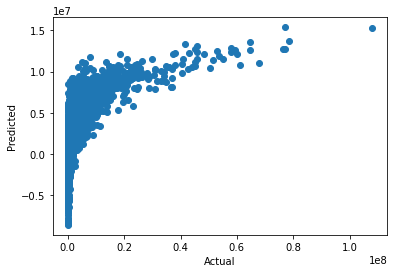

In [27]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Demographic Model

In [ ]:
dfdemo.isnull().sum()

In [ ]:
NoNullDemo=dfdemo.dropna()

In [ ]:
# y variable/ target variable 
y= NoNullDemo.Value_Euro

In [ ]:
x=NoNullDemo.drop(columns="Value_Euro").values

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Ratings Model

In [ ]:
dfrating.isnull().sum()

In [ ]:
NoNullRating=dfrating.dropna()

In [ ]:
# y variable/ target variable 
y= NoNullRating.Value_Euro

In [ ]:
x=NoNullRating.drop(columns="Value_Euro").values

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Goal Keeping Model

In [ ]:
# drop addition columns and strings (names, club and national teams, nationality, work rate)
dfGK.drop(['Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb','National_Team','Club_Team','Name','Nationality','Work_Rate','Original_Position','Positions'], axis=1, inplace=True)
dfGK.head()

In [ ]:
dfGK.isnull().sum()

In [ ]:
NoNullgoal=dfGK.dropna()

In [ ]:
x=NoNullgoal.drop(columns="Value_Euro").values

In [ ]:
# y variable/ target variable 
y= NoNullgoal.Value_Euro

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Defence Model

In [ ]:
# drop addition columns and strings (names, club and national teams, nationality, work rate)
dfDF.drop(['Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb','National_Team','Club_Team','Name','Nationality','Work_Rate','Original_Position','Positions'], axis=1, inplace=True)
dfDF.head()

In [ ]:
dfDF.isnull().sum()

In [ ]:
NoNulldef=dfDF.dropna()

In [ ]:
x=NoNulldef.drop(columns="Value_Euro").values

In [ ]:
# y variable/ target variable 
y= NoNulldef.Value_Euro

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Midfeild Model 

In [ ]:
# drop addition columns and strings (names, club and national teams, nationality, work rate)
dfMF.drop(['Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb','National_Team','Club_Team','Name','Nationality','Work_Rate','Original_Position','Positions'], axis=1, inplace=True)
dfMF.head()

In [ ]:
dfMF.isnull().sum()

In [ ]:
NoNullmid=dfMF.dropna()

In [ ]:
x=NoNullmid.drop(columns="Value_Euro").values

In [ ]:
# y variable/ target variable 
y= NoNullmid.Value_Euro

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Forwards Model 

In [ ]:
# drop addition columns and strings (names, club and national teams, nationality, work rate)
dfFW.drop(['Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb','National_Team','Club_Team','Name','Nationality','Work_Rate','Original_Position','Positions'], axis=1, inplace=True)
dfFW.head()

In [ ]:
dfFW.isnull().sum()

In [ ]:
NoNullforward=dfFW.dropna()

In [ ]:
x=NoNullforward.drop(columns="Value_Euro").values

In [ ]:
# y variable/ target variable 
y= NoNullforward.Value_Euro

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape
# remember had to remove stratisfy because of small data size

In [ ]:
model =LinearRegression()

In [ ]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [ ]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')